In [1]:
import pandas as pd
import numpy as np
import bilby
import lal
import gwpy
from gwpy.timeseries import TimeSeries
import matplotlib.pyplot as plt
import copy

from waveforms import osc_freq_XPHM, mem_freq_XPHM_only
from create_post_dict import create_post_dict, extract_relevant_info

OpenBLAS blas_thread_init: pthread_create failed for thread 60 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 500 current, 500 max
OpenBLAS blas_thread_init: pthread_create failed for thread 61 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 500 current, 500 max
OpenBLAS blas_thread_init: pthread_create failed for thread 62 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 500 current, 500 max
OpenBLAS blas_thread_init: pthread_create failed for thread 63 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 500 current, 500 max
OpenBLAS blas_thread_init: pthread_create failed for thread 64 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 500 current, 500 max
OpenBLAS blas_thread_init: pthread_create failed for thread 65 of 128: Resource temporarily unavailable
OpenBLAS blas_thread_init: RLIMIT_NPROC 500 current, 500 max
OpenBLAS b

KeyboardInterrupt: 

19:59 bilby INFO    : Waveform generator initiated with
  frequency_domain_source_model: bilby.gw.source.lal_binary_black_hole
  time_domain_source_model: None
  parameter_conversion: bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters


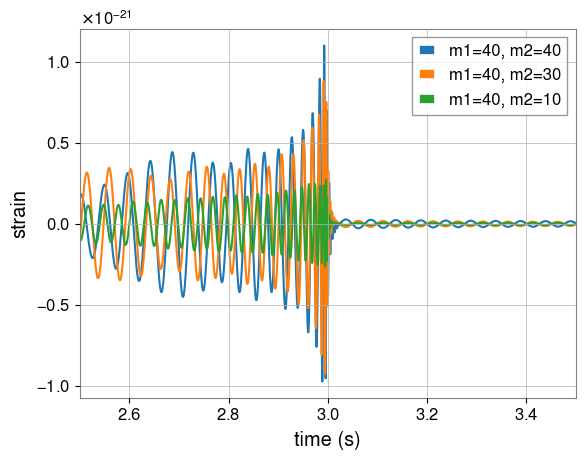

In [7]:
duration = 4
sampling_frequency = 4096
minimum_frequency = 20
maximum_frequency = 1024
reference_frequency = 20
waveform_name = 'IMRPhenomPv2'

waveform_generator_osc = bilby.gw.waveform_generator.WaveformGenerator(
    duration=duration,
    sampling_frequency=sampling_frequency,
    frequency_domain_source_model= bilby.gw.source.lal_binary_black_hole,
    parameter_conversion = bilby.gw.conversion.convert_to_lal_binary_black_hole_parameters,
    waveform_arguments=dict(duration=duration,
                            minimum_frequency=minimum_frequency,
                            maximum_frequency=maximum_frequency,
                            sampling_frequency=sampling_frequency,
                            reference_frequency=reference_frequency,
                            waveform_approximant=waveform_name,
                            )

)

parameters = dict(
    mass_1=40,
    mass_2=40,
    a_1=0.34,
    a_2=0.32,
    luminosity_distance=440,
    theta_jn=np.pi/2,
    psi=2.659,                   
    phase=5,                   
    geocent_time=1126259642.413,
    ra=3,                
    dec=-1.2108,
    tilt_1 = 0.79,
    tilt_2 = 2.36,
    time_jitter=0.001
)

parameters2 = dict(
    mass_1=40,
    mass_2=30,
    a_1=0.34,
    a_2=0.32,
    luminosity_distance=440,
    theta_jn=np.pi/2,
    psi=2.659,                   
    phase=5,                   
    geocent_time=1126259642.413,
    ra=3,                
    dec=-1.2108,
    tilt_1 = 0.79,
    tilt_2 = 2.36,
    time_jitter=0.001
)

parameters3 = dict(
    mass_1=40,
    mass_2=10,
    a_1=0.34,
    a_2=0.32,
    luminosity_distance=440,
    theta_jn=np.pi/2,
    psi=2.659,                   
    phase=5,                   
    geocent_time=1126259642.413,
    ra=3,                
    dec=-1.2108,
    tilt_1 = 0.79,
    tilt_2 = 2.36,
    time_jitter=0.001
)

time_domain_strain = waveform_generator_osc.time_domain_strain(parameters)
time_domain_strain2 = waveform_generator_osc.time_domain_strain(parameters2)
time_domain_strain3 = waveform_generator_osc.time_domain_strain(parameters3)

time_array = waveform_generator_osc.time_array

td_strain = time_domain_strain['plus'] - 1j*time_domain_strain['cross']
td_strain2 = time_domain_strain2['plus'] - 1j*time_domain_strain2['cross']
td_strain3 = time_domain_strain3['plus'] - 1j*time_domain_strain3['cross']

plt.plot(time_array, np.roll(td_strain,-4096), label='m1=40, m2=40')
plt.plot(time_array, np.roll(td_strain2, -4096), label='m1=40, m2=30')
plt.plot(time_array, np.roll(td_strain3, -4096), label='m1=40, m2=10')
plt.xlabel('time (s)')
plt.ylabel('strain')
plt.xlim(2.5, 3.5)
plt.legend()
plt.show()